### Muti Qubits Circuits

In [7]:
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [8]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

--------

##### Controlled Phase Rotation

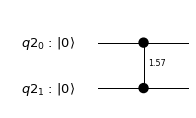

In [9]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cu1(pi/2,q[0], q[1])
qc.draw(output='mpl')

In [10]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]])

-------------------

##### U operator and control phase gate

$ (I \otimes I \otimes U_3)  \times (I \otimes CU_1 ) \times (I \otimes U_3 \otimes I)  \times (CU_1 \otimes I) \times (U_3 \otimes I \otimes I)$

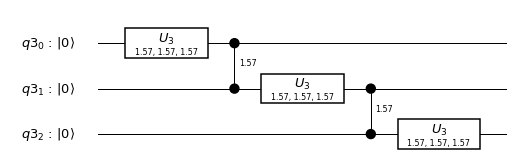

In [11]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)

qc.u3(pi/2,pi/2,pi/2,q[0])
qc.cu1(pi/2,q[0], q[1])
qc.u3(pi/2,pi/2,pi/2,q[1])
qc.cu1(pi/2,q[1], q[2])
qc.u3(pi/2,pi/2,pi/2,q[2])

qc.draw(output='mpl')

In [12]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.354+0.j   ,  0.   -0.354j,  0.   -0.354j, -0.354+0.j   ,
         0.   -0.354j, -0.354+0.j   , -0.354+0.j   ,  0.   +0.354j],
       [ 0.   +0.354j, -0.354+0.j   ,  0.   +0.354j, -0.354+0.j   ,
         0.354+0.j   ,  0.   +0.354j,  0.354+0.j   ,  0.   +0.354j],
       [ 0.   +0.354j,  0.354+0.j   , -0.354+0.j   ,  0.   +0.354j,
         0.   +0.354j,  0.354+0.j   , -0.354+0.j   ,  0.   +0.354j],
       [-0.354+0.j   ,  0.   -0.354j,  0.354+0.j   ,  0.   +0.354j,
        -0.354+0.j   ,  0.   -0.354j,  0.354+0.j   ,  0.   +0.354j],
       [ 0.   +0.354j,  0.354+0.j   ,  0.354+0.j   ,  0.   -0.354j,
        -0.354+0.j   ,  0.   +0.354j,  0.   +0.354j,  0.354+0.j   ],
       [-0.354+0.j   ,  0.   -0.354j, -0.354+0.j   ,  0.   -0.354j,
         0.   -0.354j,  0.354+0.j   ,  0.   -0.354j,  0.354+0.j   ],
       [-0.354+0.j   ,  0.   +0.354j,  0.   -0.354j, -0.354+0.j   ,
         0.354+0.j   ,  0.   -0.354j,  0.   +0.354j,  0.354+0.j   ],
       [ 0.   -0.354j,  0.354+0.j   ,  0.

------------

#### All Gates together in 4-qubit circut

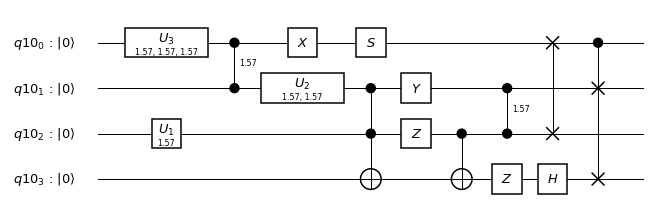

In [21]:
q = QuantumRegister(4)
qc = QuantumCircuit(q)

qc.u3(pi/2,pi/2,pi/2,q[0])
qc.cu1(pi/2,q[0], q[1])
qc.u2(pi/2,pi/2,q[1])
qc.u1(pi/2,q[2])
qc.x(q[0])
qc.ccx(q[1],q[2],q[3])
qc.y(q[1])
qc.z(q[2])
qc.cx(q[2],q[3])
qc.z(q[3])
qc.h(q[3])
qc.s(q[0])
qc.cu1(pi/2,q[1], q[2])
qc.swap(q[0],q[2])
qc.cswap(q[0],q[1],q[3])

qc.draw(output='mpl')

In [22]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.   +0.354j, -0.354+0.j   ,  0.   -0.354j,  0.354+0.j   ,
         0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
         0.   -0.354j,  0.354+0.j   ,  0.   +0.354j, -0.354+0.j   ,
         0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
         0.354+0.j   ,  0.   +0.354j, -0.354+0.j   ,  0.   -0.354j,
         0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
        -0.354+0.j   ,  0.   -0.354j,  0.354+0.j   ,  0.   +0.354j],
       [-0.354+0.j   ,  0.   -0.354j, -0.354+0.j   ,  0.   -0.354j,
         0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
         0.354+0.j   ,  0.   +0.354j,  0.354+0.j   ,  0.   +0.354j,
         0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
         0.354+0.j   ,  0.   +0.354j, -0.354+0.j   ,  0.   -0.354j,
         0.   +0.j   ,  0.   +0.j   ,  0.   +